In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, f1_score, auc

In [75]:
df = sns.load_dataset("titanic")

In [76]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [77]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [78]:
df = df.drop(['deck', 'embarked'], axis=1)

In [79]:
df['age'] = df['age'].fillna(df['age'].mean())

In [80]:
df['embark_town'] = df['embark_town'].ffill()

In [81]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [82]:
le = LabelEncoder()
mms = MinMaxScaler()

In [83]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        df[col] = mms.fit_transform(df[[col]])
    else:
        df[col] = le.fit_transform(df[col])

In [84]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0.0,1.0,1,0.271174,0.125,0.0,0.014151,2,1,1.0,2,0,0.0
1,1.0,0.0,0,0.472229,0.125,0.0,0.139136,0,2,0.0,0,1,0.0
2,1.0,1.0,0,0.321438,0.000,0.0,0.015469,2,2,0.0,2,1,1.0
3,1.0,0.0,0,0.434531,0.125,0.0,0.103644,0,2,0.0,2,1,0.0
4,0.0,1.0,1,0.434531,0.000,0.0,0.015713,2,1,1.0,2,0,1.0


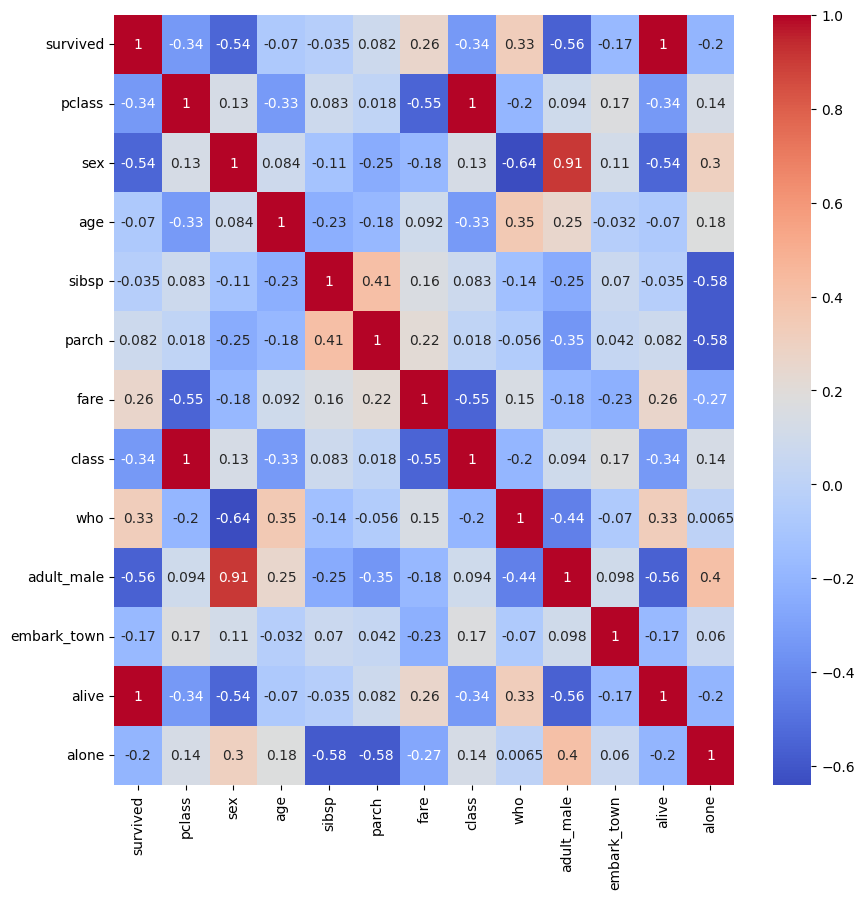

In [113]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [86]:
#feature / target split
x = df.drop(['sex'], axis=1)
y = df[['sex']]

In [87]:
y.value_counts()

sex
1      577
0      314
Name: count, dtype: int64

In [88]:
x.shape, y.shape

((891, 12), (891, 1))

In [89]:
#random under smapler
rus = RandomUnderSampler()

In [90]:
new_x, new_y = rus.fit_resample(x,y)
new_x.shape, new_y.shape

((628, 12), (628, 1))

In [91]:
new_y.value_counts()

sex
0      314
1      314
Name: count, dtype: int64

In [92]:
xtrain, xtest, ytrain, ytest = train_test_split(new_x, new_y, test_size=0.2, random_state=42)

In [93]:
xtrain.head()

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
333,0.0,1.0,0.195778,0.250,0.000000,0.035134,2,1,1.0,2,0,0.0
11,1.0,0.0,0.723549,0.000,0.000000,0.051822,0,2,0.0,2,1,1.0
293,0.0,1.0,0.296306,0.000,0.000000,0.017274,2,2,0.0,2,0,1.0
312,0.0,0.5,0.321438,0.125,0.166667,0.050749,1,2,0.0,2,0,0.0
93,0.0,1.0,0.321438,0.125,0.333333,0.040160,2,1,1.0,2,0,0.0


In [94]:
ytrain.head()

,sex
333,1
11,0
293,0
312,0
93,1


In [95]:
dect = DecisionTreeClassifier()

In [96]:
model = dect.fit(xtrain, ytrain)

In [97]:
xtrain.head()

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
333,0.0,1.0,0.195778,0.250,0.000000,0.035134,2,1,1.0,2,0,0.0
11,1.0,0.0,0.723549,0.000,0.000000,0.051822,0,2,0.0,2,1,1.0
293,0.0,1.0,0.296306,0.000,0.000000,0.017274,2,2,0.0,2,0,1.0
312,0.0,0.5,0.321438,0.125,0.166667,0.050749,1,2,0.0,2,0,0.0
93,0.0,1.0,0.321438,0.125,0.333333,0.040160,2,1,1.0,2,0,0.0


In [98]:
ytrain.head()

,sex
333,1
11,0
293,0
312,0
93,1


In [99]:
model.score(xtrain, ytrain)

0.99800796812749

In [100]:
model.score(xtest, ytest)

0.9841269841269841

In [101]:
pred = model.predict(xtest)

In [102]:
cm = confusion_matrix(ytest, pred)
cm

array([[68,  2],
       [ 0, 56]])

<Axes: >

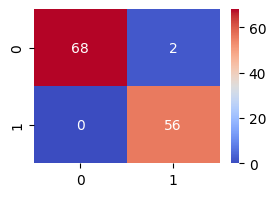

In [116]:
plt.figure(figsize=(3,2))
sns.heatmap(cm, annot=True, cmap='coolwarm')

In [103]:
#classification report
cl = classification_report(ytest, pred)
print(cl)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        70
           1       0.97      1.00      0.98        56

    accuracy                           0.98       126
   macro avg       0.98      0.99      0.98       126
weighted avg       0.98      0.98      0.98       126



In [104]:
acc = accuracy_score(ytest, pred)
acc

0.9841269841269841

In [105]:
f1 = f1_score(ytest, pred)
f1

0.9824561403508771

In [106]:
ras = roc_auc_score(ytest, pred)
ras

0.9857142857142857

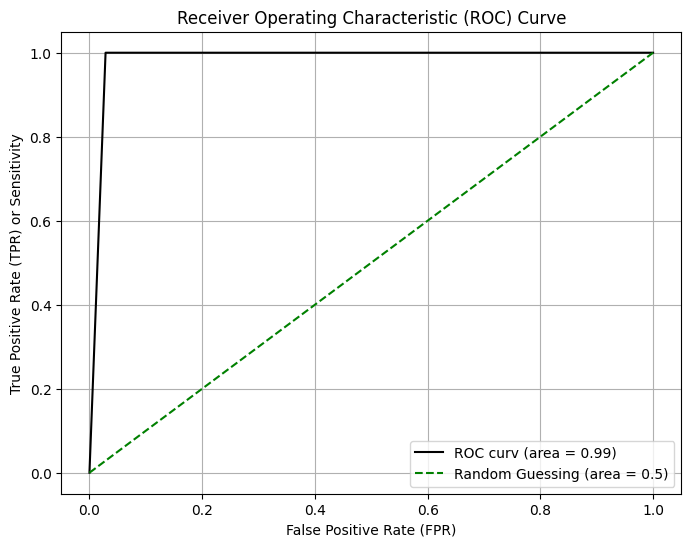

In [107]:
fpr, tpr, thresholds = roc_curve(ytest, pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='black', label = f'ROC curv (area = {roc_auc:.2f})')
plt.plot([0,1],[0,1], color='green', linestyle='--', label = 'Random Guessing (area = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

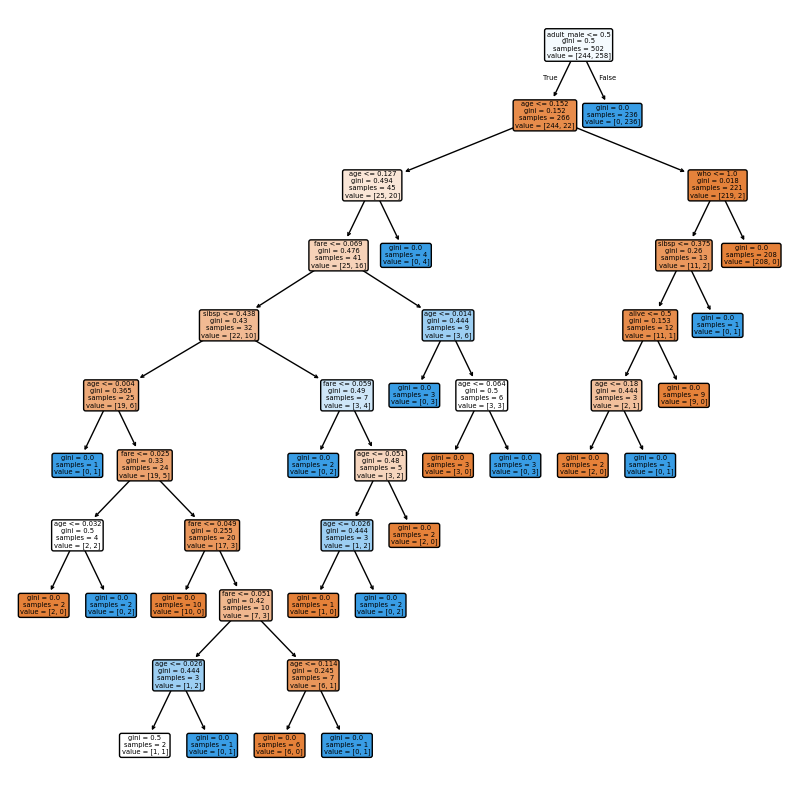

In [111]:
plt.figure(figsize=(10,10))
plot_tree(model, feature_names=x.columns, filled=True, rounded=True)
plt.show()